# LAB 3 - LOGISTIC REGRESSION

This lab is comprised of two main sections:

- 1. Logistic Regression with only numerical variables

- 2. Logistic Regression with numerical + categorical variables

In this lab we will use the help of statistical packages `statsmodels` and also `sklearn` for plotting and for splitting. These are two of the most complete libraries for statistical modeling in Python.

### Load the Data

In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt #plots
import seaborn as sns #plots

As usual, we summon `numpy` and `pandas` for dataset representation and manipulation.

In [6]:
path = os.getcwd() + "/loans.csv"
loans = pd.read_csv(path)
loans.info()
loans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516 entries, 0 to 9515
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   not.fully.paid  9516 non-null   int64  
 1   installment     9516 non-null   float64
 2   log.annual.inc  9516 non-null   float64
 3   fico            9516 non-null   int64  
 4   revol.bal       9516 non-null   float64
 5   inq.last.6mths  9516 non-null   int64  
 6   pub.rec         9516 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 520.5 KB


,not.fully.paid,installment,log.annual.inc,fico,revol.bal,inq.last.6mths,pub.rec
0,0,829.10,4.929419,737,28.854,0,0
1,0,228.22,4.812913,707,33.623,0,0
2,0,366.86,4.505150,682,3.511,1,0
3,0,162.34,4.929419,712,33.667,1,0
4,0,102.92,4.907411,667,4.740,0,0


## 1. LOGISTIC REGRESSION (ONLY NUMERICAL VARIABLES)

### Renaming Columns
This dataset was thought for a R analysis (the hint is the dotted columns names). In Python we prefer to use (to avoid code confusion) either underscore naming or "camel" (eg not_fully_paid or notFullyPaid)

In [7]:
new_column_names = {'not.fully.paid':'not_fully_paid', 'log.annual.inc':'log_annual_inc',
                   'revol.bal':'revol_bal', 'inq.last.6mths':'inq_last_6mths', 'pub.rec':'pub_rec'}
loans.rename(columns = new_column_names, inplace = True)
# in place is used to tell Python not to create a new copy of the df with 
# the new columns names but to update the current dataframe

print(loans.columns)

Index(['not_fully_paid', 'installment', 'log_annual_inc', 'fico', 'revol_bal',
       'inq_last_6mths', 'pub_rec'],
      dtype='object')


### Splitting the Data

In previous labs we saw how to split the dataset using randomized methods to avoid a biased training. We saw how to split ourselves the dataset, but also the `sklearn` function, which is waht we are going to use from now on.

!!!!!!!!! We also set a fixed random state in order to exactly replicate the results at each execution of the code !!!!!!!!!!!!

In [8]:
from sklearn.model_selection import train_test_split

loans_train, loans_test = train_test_split(loans, test_size=0.25, random_state=881981)
loans_train.shape, loans_test.shape

((7137, 7), (2379, 7))

`test_size = 0.25` means that we will put 25% of the data in the test set, 75% in the training set.

In [9]:
# How many loans have defaulted?

default_false = np.sum(loans_train['not_fully_paid'] == 0)
default_true = np.sum(loans_train['not_fully_paid'] == 1)

print(pd.Series({'0': default_false, '1': default_true}))

0    5994
1    1143
dtype: int64


## Why it is important to check this information?

We are going to optimise the ability of our model to fit the training data, if during training the only data seen are non defaulted loans, our algorithm would become biased to assign a non defaulted output to every loan in the future. 

In general, this is why sometime in some projects where one outcome is very unlikely, it is preferable to get rid of some data to have a more omogeneous distribution over the outcome.

This is also the reason why we have different metrics for logistic regression (see in a minute) a nd not only the accuracy (which is of course important nonetheless).

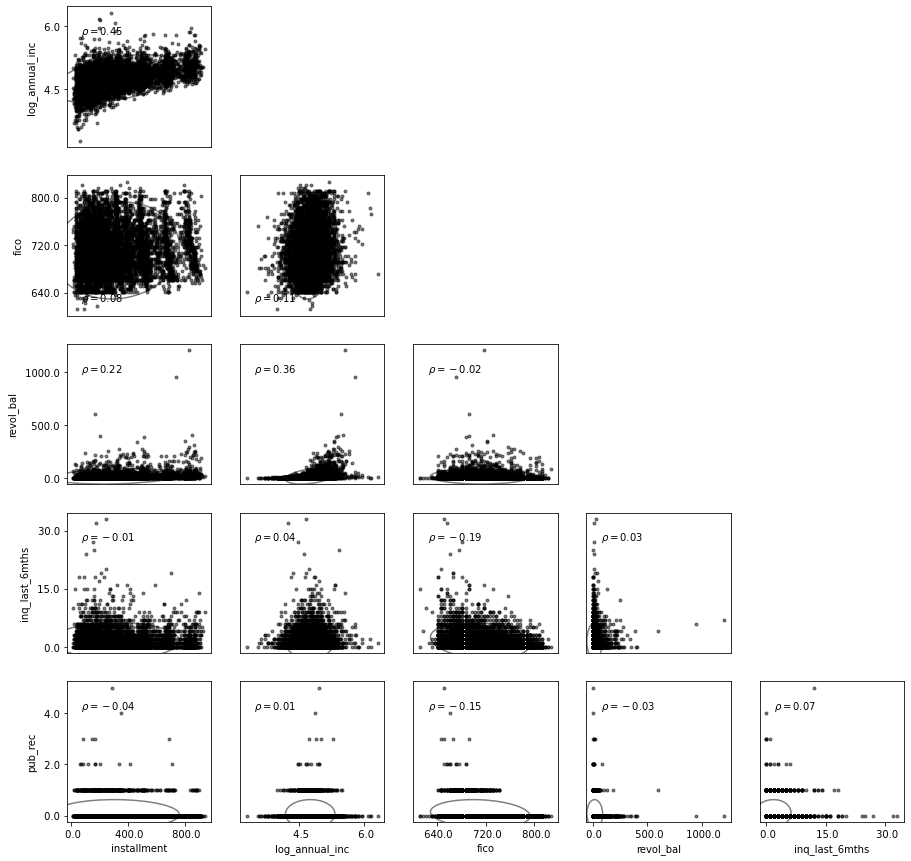

None


In [10]:
from statsmodels.graphics.plot_grids import scatter_ellipse
import warnings
warnings.simplefilter('ignore')
fig = plt.figure(figsize=(15, 15))
cols = loans_train.columns[loans_train.columns != "not_fully_paid"]
scatter_ellipse(loans_train[cols], varnames=loans_train[cols].columns, fig=fig)
print(plt.show())

A baseline model can be a so-called "dummy" model, where the classifier predicts every new observation as the majority class. In our case, for a datapoint with any given features, the baseline model will predict 'no-default' always.

In [11]:
# Accuracy of baseline model based on training data:
ACC = default_false/(default_false + default_true)
ACC

0.8398486759142497

In [12]:
# EXERCISE: Compute accuracy of baseline on testing:
test_default_false = np.sum(loans_test['not_fully_paid'] == 0)
test_default_true = np.sum(loans_test['not_fully_paid'] == 1)
test_ACC = test_default_false/(test_default_false + test_default_true)
test_ACC

0.8411097099621689

83.9% vs 84.1: the random split it's preserving the data distribution. Imagine splitting on an important attribute and having these two numbers different: can you see the problem?

## The other metrics: TPR and FPR

The confusion matrix can be read in different ways based on the goal of our analysis.
As engineers, we have to ask ourselves "what is the most dangerous mistake my algorithm can do?"

Ex: if my algorithm has to detect a disease, if the prediction is the presence of the disease for a healthy patient, the patient is going to do some extra exams, but if the prediction is the absence of the disease for a ill patient, the risk of death might increase a lot --> we care more about false negatives than false positives!

In the `sklearn` class for logistic regression, you can turn around this problem using the `class_weight` (dict or `balanced`, default=None) or playing with the threshold.

For details on confusion matrix: [Confusion matrix](https://medium.datadriveninvestor.com/confusion-matric-tpr-fpr-fnr-tnr-precision-recall-f1-score-73efa162a25f) or see the textbook

In [13]:
# EXERCISE: What are the TPR and FPR rates of the baseline model?


### Fitting the Logistic Regression Model

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X=loans_train[cols], y=loans_train['not_fully_paid'])

LogisticRegression()

In [1]:
model.fit?

Object `model.fit` not found.


In [2]:
LogisticRegression?

Object `LogisticRegression` not found.


In [15]:
bal_model = LogisticRegression(class_weight='balanced')
bal_model.fit(X=loans_train[cols], y=loans_train['not_fully_paid'])

LogisticRegression(class_weight='balanced')

## Difference in accuracy
what do you expect? Who is going to be the best performance model?

In [13]:
print(model.score(X=loans_train[cols], y=loans_train['not_fully_paid']))
print(bal_model.score(X=loans_train[cols], y=loans_train['not_fully_paid']))

0.8402690205968895
0.6593806921675774


### Balanced model seems to perform much worse right?
What if we are looking at a different metric?

In [16]:
from sklearn.metrics import confusion_matrix
y_test = loans_test['not_fully_paid']
y_pred = model.predict(loans_test[cols])
cm = confusion_matrix(y_test, y_pred)
cm

array([[1991,   10],
       [ 375,    3]], dtype=int64)

In [15]:
y_pred_bal = bal_model.predict(loans_test[cols])
cm = confusion_matrix(y_test, y_pred_bal)
cm

array([[1335,  666],
       [ 194,  184]])

The predict function is using 0.5 as a threshold, we can play around with the number (break even point of average profit is 0.2 as you have seen in class

In [16]:
y_prob = model.predict_proba(loans_test[cols])
threshold = 0.2
y_pred = y_prob[:, 1] >= threshold
cm = confusion_matrix(y_test, y_pred)
cm

array([[1683,  318],
       [ 256,  122]])

On the balanced model, it is not very sensitive to play with the threshold because we already took into account the not evenly distribution when penalising the error!

In [19]:
y_prob_bal = bal_model.predict_proba(loans_test[cols])
threshold = 0.5
y_pred_bal = y_prob_bal[:, 1] >= threshold
cm = confusion_matrix(y_test, y_pred_bal)
cm

array([[1335,  666],
       [ 194,  184]])

Now we can use the statsmodels package to fit the training set to a logistic regression model

In [20]:
import statsmodels.formula.api as smf

#?smf.logit

In [21]:
# Fit the logistic regression model

logreg = smf.logit(formula = 'not_fully_paid ~ installment + log_annual_inc + fico + revol_bal + inq_last_6mths + pub_rec',
                   data = loans_train).fit()

print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.414812
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         not_fully_paid   No. Observations:                 7137
Model:                          Logit   Df Residuals:                     7130
Method:                           MLE   Df Model:                            6
Date:                Fri, 16 Sep 2022   Pseudo R-squ.:                 0.05708
Time:                        11:34:43   Log-Likelihood:                -2960.5
converged:                       True   LL-Null:                       -3139.7
Covariance Type:            nonrobust   LLR p-value:                 2.425e-74
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          9.3203      0.952      9.793      0.000       7.455      11.186
installment      

In general, consider this quote:
"Programs are meant to be read by humans, and only incidentally for computers to execute." - Donald Knuth

### Predictions

In [22]:
# Example of prediction for a new observation

new_obs = pd.DataFrame(data = {'installment' : [366], 'log_annual_inc' : [4.51], 'fico' : [682],
                               'revol_bal' : [7.53], 'inq_last_6mths' : [1], 'pub_rec' : [0]})

logreg.predict(new_obs)

0    0.209692
dtype: float64

In [23]:
y_test = loans_test['not_fully_paid']

y_prob = logreg.predict(loans_test)
y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob], index=y_prob.index)

# y_pred is the vector of probabilities as given by your model on the test set. Values between 0 and 1.
# Remember, P(Yi = 1) = 1/(1 + e^(-(b0 + b1*x1 + b2*x2 +...)) )

### Confusion Matrix

In order to evaluate the performance of our classification model, we can make use of confusion matrix to compute a variety of useful metrics

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[1989   12]
 [ 375    3]]


In [25]:
print(cm.ravel())

[1989   12  375    3]


In [26]:
# Accuracy

(cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())

0.8373266078184111

In [ ]:
# EXERCISE: What is the True Positive Rate ?


# EXERCISE: What is the False Positive rate ?


Be careful about the definitions of FPR, TPR, recall, precision, sensitivity, specificity etc:
https://en.wikipedia.org/wiki/Sensitivity_and_specificity

Little reminder:
- Accuracy: good predictions/total predictions
- Sensitivity = $\frac{TP}{TP + FN}$, aka TPR
- Specificity = $\frac{TN}{TN + FP}$
- $FPR = \frac{FP}{TN + FP}$

etc

In [ ]:
# Now, try threshold probability = 0.2

# EXERCISE: What is the Accuracy?


# EXERCISE: What is the True Positive Rate ?


# EXERCISE: What is the False Positive rate ?



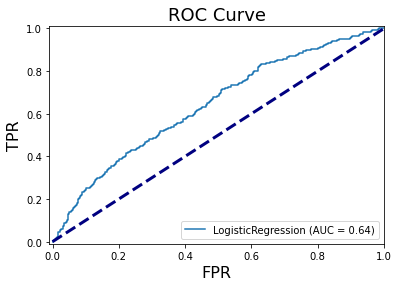

In [27]:
from sklearn.metrics import plot_roc_curve


plot_roc_curve(model, loans_test[cols], loans_test['not_fully_paid'])
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.legend(loc='lower right', fontsize=10)
plt.show()


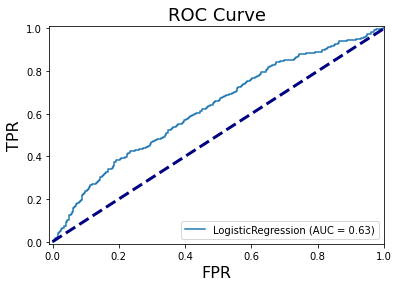

In [28]:
plot_roc_curve(bal_model, loans_test[cols], loans_test['not_fully_paid'])
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.legend(loc='lower right', fontsize=10)
plt.show()


## 2. LOGISTIC REGRESSION (NUMERICAL + CATEGORICAL VARIABLES)

In [29]:
churn = pd.read_csv("customerchurn.csv")
churn.info()
churn.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            7032 non-null   int64  
 1   MonthlyCharges   7032 non-null   float64
 2   SeniorCitizen    7032 non-null   int64  
 3   PaymentMethod    7032 non-null   object 
 4   InternetService  7032 non-null   object 
 5   tenure           7032 non-null   int64  
 6   Contract         7032 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 384.7+ KB


,Churn,MonthlyCharges,SeniorCitizen,PaymentMethod,InternetService,tenure,Contract
0,0,29.85,0,Electronic check,DSL,1,Month-to-month
1,0,56.95,0,Mailed check,DSL,34,One year
2,1,53.85,0,Mailed check,DSL,2,Month-to-month
3,0,42.30,0,Bank transfer,DSL,45,One year
4,1,70.70,0,Electronic check,Fiber optic,2,Month-to-month


In [30]:
churn_train, churn_test = train_test_split(churn, test_size=0.3, random_state=881981)
churn_train.shape, churn_test.shape

((4922, 7), (2110, 7))

In [31]:
logreg2 = smf.logit(formula = 'Churn ~ MonthlyCharges + SeniorCitizen + PaymentMethod + InternetService + tenure + Contract',
                       data = churn_train).fit()
print(logreg2.summary())

Optimization terminated successfully.
         Current function value: 0.430570
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4911
Method:                           MLE   Df Model:                           10
Date:                Fri, 16 Sep 2022   Pseudo R-squ.:                  0.2558
Time:                        11:47:53   Log-Likelihood:                -2119.3
converged:                       True   LL-Null:                       -2847.7
Covariance Type:            nonrobust   LLR p-value:                5.162e-307
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.6797      0.207     -3

In [ ]:
# EXERCISE: Now take the estimate for SeniorCitizen and transform it into an intuition of how much p will increase
# see log odd interpretation in the lecture notes


In [32]:
# Let's remove MonthlyCharges
logreg3 = smf.logit(formula = 'Churn ~ SeniorCitizen + PaymentMethod + InternetService + tenure + Contract',
                       data = churn_train).fit()
print(logreg3.summary())

Optimization terminated successfully.
         Current function value: 0.430683
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4912
Method:                           MLE   Df Model:                            9
Date:                Fri, 16 Sep 2022   Pseudo R-squ.:                  0.2556
Time:                        11:48:50   Log-Likelihood:                -2119.8
converged:                       True   LL-Null:                       -2847.7
Covariance Type:            nonrobust   LLR p-value:                6.843e-308
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.5019      0.120     -4

In [33]:
# Let's remove PaymentMethod Credit Card and PaymentMethodMailed check. How do we do this? Create a new feature. 

churn_train2 = churn_train.copy() 
churn_train2['ElectronicCheck'] = (churn_train2['PaymentMethod'] == 'Electronic check').astype('int64')
churn_train2.drop(columns=['PaymentMethod'], inplace=True)

# Let's do the same for test set as well

churn_test2 = churn_test.copy() 
churn_test2['ElectronicCheck'] = (churn_test2['PaymentMethod'] == 'Electronic check').astype('int64')
churn_test2.drop(columns=['PaymentMethod'], inplace=True)

churn_test2.head()

,Churn,MonthlyCharges,SeniorCitizen,InternetService,tenure,Contract,ElectronicCheck
4293,0,24.60,0,No,24,One year,0
3605,0,99.65,0,Fiber optic,41,Two year,0
4753,0,25.00,0,No,72,Two year,0
2531,1,25.30,0,No,25,One year,0
3840,0,20.00,0,No,10,Month-to-month,0


In [34]:
logreg4 = smf.logit(formula = 'Churn ~ SeniorCitizen + ElectronicCheck + InternetService + tenure + Contract',
                       data = churn_train2).fit()
print(logreg4.summary())

Optimization terminated successfully.
         Current function value: 0.430699
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4914
Method:                           MLE   Df Model:                            7
Date:                Fri, 16 Sep 2022   Pseudo R-squ.:                  0.2556
Time:                        11:50:11   Log-Likelihood:                -2119.9
converged:                       True   LL-Null:                       -2847.7
Covariance Type:            nonrobust   LLR p-value:                3.561e-310
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -0.5353      0.084     -6.385     

In [35]:
# Confusion matrices based on decision tree threshold 
# Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of decisions (as returned by “decision_function” on some classifiers).

y_test = churn_test2['Churn']
y_prob = logreg4.predict(churn_test2)
y_pred = pd.Series([1 if x > 1/3 else 0 for x in y_prob], index=y_prob.index)

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[1236  311]
 [ 144  419]]


### ROC Curves

In [36]:
y_train = churn_train2['Churn']
X_train = churn_train2.drop(['Churn'], axis=1)

y_test = churn_test2['Churn']
X_test = churn_test2.drop(['Churn'], axis=1)

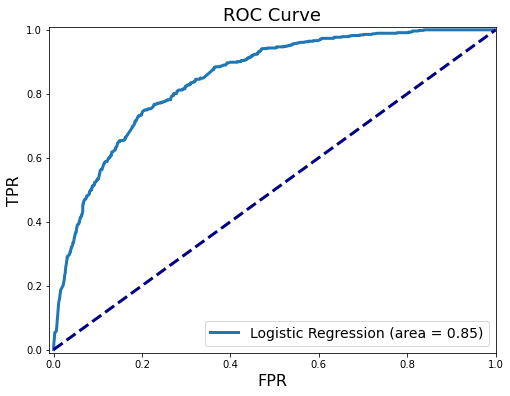

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.legend(loc='lower right', fontsize=14)
plt.show()

## Nice link for math over logistic regression

[CMU MLE for logistic regression](https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf)